The objective is to build a model to predict the quality of the wine. 

For that, we are going to use the wine quality datasets available at the [UCI website](https://archive.ics.uci.edu/ml/datasets/wine+quality).
The two datasets included are related to red and white wine samples, from the north of Portugal.

In [4]:
import bentoml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Data Understanding

|Variable |
| --- |
|fixed acidity |
|volatile acidity |
|citric acid |
|residual sugar |
|chlorides |
|free sulfur dioxide |
|total sulfur dioxide |
|density |
|pH	|
|sulphates |
|alcohol |
|quality (score between 0 and 10) |

In [143]:
# load white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
# load red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [144]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [145]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [146]:
# no missing data
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [147]:
# no missing data
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [148]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [149]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


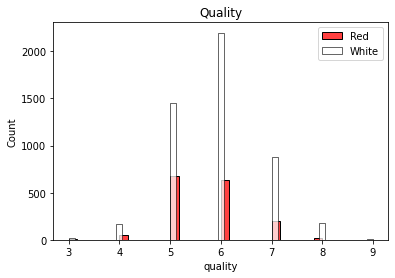

In [150]:
# quality is centered at 6 for white wine, and centered in 5 for red whine
fig = plt.Figure(figsize=(10, 4))
sns.histplot(red['quality'], label="Red", color='red')
sns.histplot(white['quality'], label="White", color='white')
plt.title('Quality')
plt.legend();

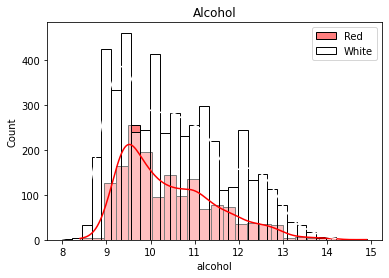

In [151]:
# differences in alcohol
fig = plt.Figure(figsize=(10, 4))
sns.histplot(red['alcohol'], label="Red", kde=True, color='red')
sns.histplot(white['alcohol'], label="White", kde=True, color='white')
plt.title('Alcohol')
plt.legend();

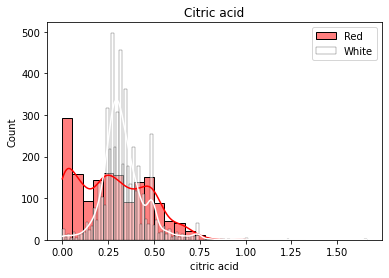

In [152]:
# differences in citric acid
fig = plt.Figure(figsize=(10, 4))
sns.histplot(red['citric acid'], label="Red", kde=True, color='red')
sns.histplot(white['citric acid'], label="White", kde=True, color='white')
plt.title('Citric acid')
plt.legend();

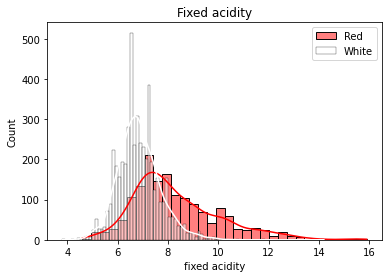

In [153]:
# differences in fixed acidity 
fig = plt.Figure(figsize=(10, 4))
sns.histplot(red['fixed acidity'], label="Red", kde=True, color='red')
sns.histplot(white['fixed acidity'], label="White", kde=True, color='white')
plt.title('Fixed acidity')
plt.legend();

Text(0.5, 1.0, 'White Wine')

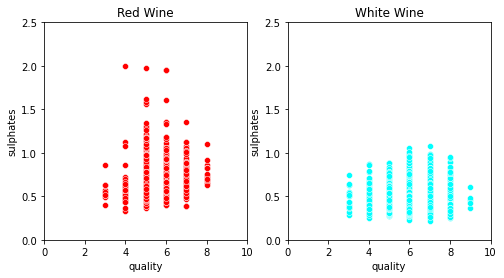

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(x="quality", y="sulphates", data=red, color='red', ax=ax[0])
sns.scatterplot(x="quality", y="sulphates", data=white, color='cyan', ax=ax[1])

ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")

In [155]:
# Add type column to 'red' with value
red['type'] = 1
# Add type column to 'white' with value 0
white['type'] = 0
# Append datasets to a new dataset
dataset = pd.concat([red, white], ignore_index=True)

In [156]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


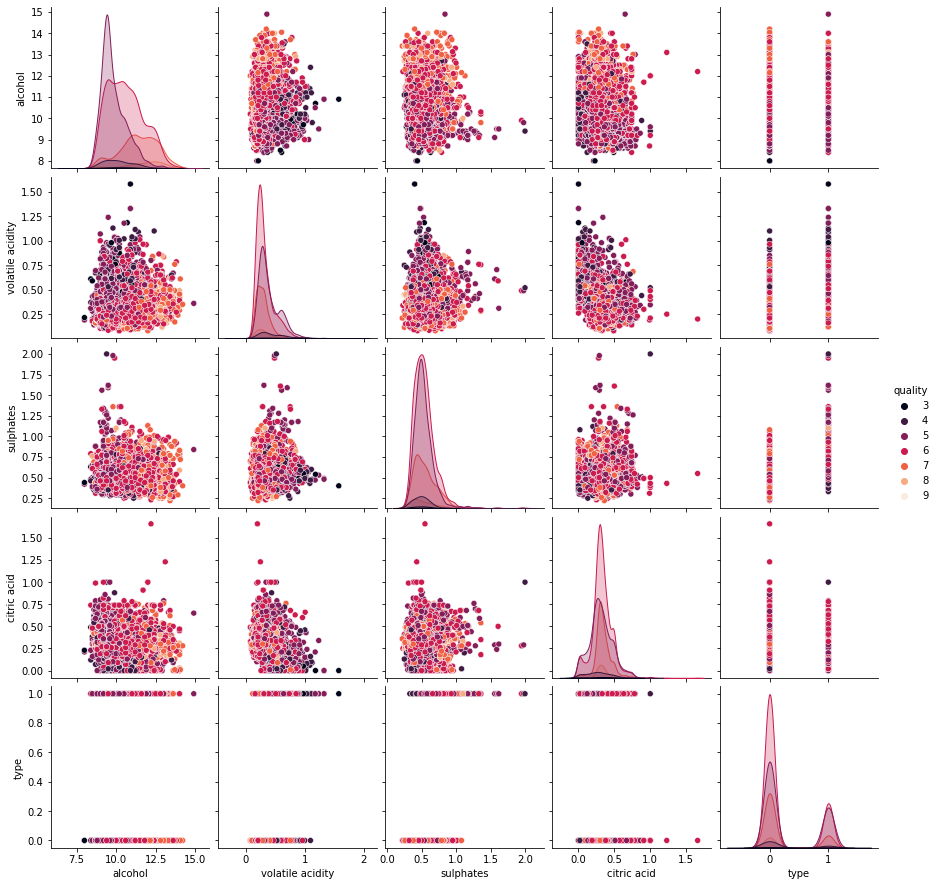

In [157]:
# Plot is not very clear as there are too many classes. 
# We would need to create additional plots to understand better the analyses.
sns.pairplot(dataset[['alcohol','volatile acidity', 'sulphates', 'quality', 'citric acid', 'type']], hue="quality", palette="rocket")

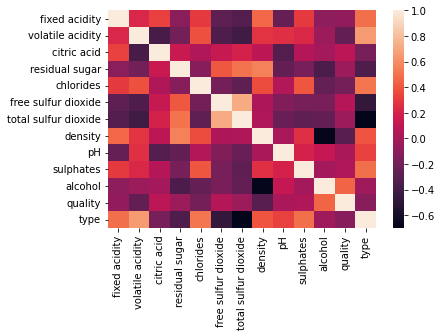

In [158]:
# check correlation
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Data preparation & Modeling

In [159]:
# Specify X and y
X = dataset.drop(['quality'],axis=1)
y = dataset['quality']

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [160]:
# Scale dataset
scaler = StandardScaler()
# Scale the train set
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# Scale the test set
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Hyper-parameter Tuning

In [161]:
# Optimize the performance using a Grid-search and Cross-validation strategy to search the best configurations (model and hyperparameters)

# Create a dummy regressor for building the pipeline
pipe = Pipeline([('regressor', DummyRegressor())])

# Create space of candidate models and some of their hyperparameters
search_space = [{'regressor': [LinearRegression()]},
                {'regressor': [RandomForestRegressor(random_state=0)],
                 'regressor__n_estimators': [10, 50, 100 ,200],
                 'regressor__max_depth': [None, 5, 10, 15]}]

# Search the space in a grid-like approach, selecting at the end the model with the best RMSE metric
gs = RandomizedSearchCV(pipe, search_space,
                        cv=5, verbose=2,
                        scoring='neg_root_mean_squared_error')
best_model = gs.fit(X_train, y_train)

# See which model was the best
best_model.best_estimator_.get_params()['regressor']

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END regressor=RandomForestRegressor(random_state=0), regressor__max_depth=10, regressor__n_estimators=10; total time=   0.1s
[CV] END regressor=RandomForestRegressor(random_state=0), regressor__max_depth=10, regressor__n_estimators=10; total time=   0.1s
[CV] END regressor=RandomForestRegressor(random_state=0), regressor__max_depth=10, regressor__n_estimators=10; total time=   0.1s
[CV] END regressor=RandomForestRegressor(random_state=0), regressor__max_depth=10, regressor__n_estimators=10; total time=   0.1s
[CV] END regressor=RandomForestRegressor(random_state=0), regressor__max_depth=10, regressor__n_estimators=10; total time=   0.1s
[CV] END regressor=RandomForestRegressor(random_state=0), regressor__max_depth=None, regressor__n_estimators=10; total time=   0.1s
[CV] END regressor=RandomForestRegressor(random_state=0), regressor__max_depth=None, regressor__n_estimators=10; total time=   0.1s
[CV] END regressor=Random

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=0)

### Evaluation

In [162]:
# Predict for the test set
y_pred = best_model.predict(X_test)

In [163]:
# round and clip predictions to the possible values for quality
y_pred = y_pred.round().clip(0, 10)

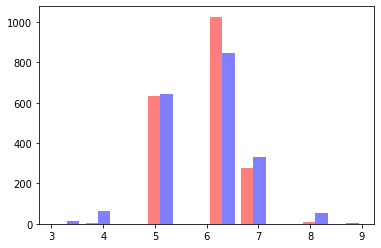

In [164]:
# plot counts pred vs true
plt.hist([y_pred, y_test], color=['r','b'], alpha=0.5);

In [174]:
#RMSE
rmse = mean_squared_error(y_pred, y_test, squared=False)
print(f"RMSE = {rmse.round(2)}")
# Accuracy 
print(f"Accuracy = {accuracy_score(y_test, y_pred).round(2)}")
# Precision 
print(f"Precision = {precision_score(y_test, y_pred, average='weighted', zero_division=0).round(2)}")
# Recall
print(f"Recall = {recall_score(y_test, y_pred, average='weighted').round(2)}")
# F1 score
print(f"F1-score = {f1_score(y_test, y_pred, average='weighted').round(2)}")
# Confusion matrix
print(f"Confusion matrix \n{confusion_matrix(y_test, y_pred)}")

RMSE = 0.69
Accuracy = 0.65
Precision = 0.65
Recall = 0.65
F1-score = 0.63
Confusion matrix 
[[  0   0   6   5   1   0   0]
 [  0   1  54   9   0   0   0]
 [  0   1 432 202   8   0   0]
 [  0   0 133 646  66   0   0]
 [  0   0  10 144 175   0   0]
 [  0   0   0  21  26   7   0]
 [  0   0   0   0   3   0   0]]


### Model Interpretation/Explanation

<AxesSubplot:xlabel='feature_importance', ylabel='feature'>

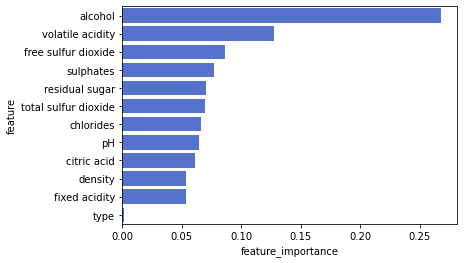

In [166]:
# See which features are most important for the best model
df_feat = pd.DataFrame({'feature': X_test.columns,
                        'feature_importance': best_model.best_estimator_.named_steps["regressor"].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)

sns.barplot(x='feature_importance', y='feature', data=df_feat, orient='h', color='royalblue')

### Save model using bentoml

In [176]:
saved_model = bentoml.sklearn.save_model(
    "wine",   # model name in the local model store
    best_model.best_estimator_,  # model instance being saved
    labels={    # user-defined labels for managing models in Yatai
        "owner": "cpereira",
        "stage": "dev",
    },
    metadata={  # user-defined additional metadata
        "rmse": rmse,
        "dataset_version": "20221101",
    },
    custom_objects={    # save additional user-defined python objects
        "scaler": scaler,
    }
)
print(f"Model saved: {saved_model}")

Model saved: Model(tag="wine:ptem4qs2zgbjftqh")
